/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

Loss for epoch 1 : 10.239743661263306
Loss for epoch 2 : 9.890990538284619
Loss for epoch 3 : 9.562336090463672
Loss for epoch 4 : 9.254613444095202
Loss for epoch 5 : 8.968235214983347
Loss for epoch 6 : 8.703174332459529
Loss for epoch 7 : 8.458988652730532
Loss for epoch 8 : 8.234877864260298
Loss for epoch 9 : 8.029759201483634
Loss for epoch 10 : 7.842350753217108
Loss for epoch 11 : 7.671253254858079
Loss for epoch 12 : 7.515022908640845
Loss for epoch 13 : 7.372230500001808
Loss for epoch 14 : 7.241505343023014
Loss for epoch 15 : 7.121564847736486
Loss for epoch 16 : 7.011231614805796
Loss for epoch 17 : 6.909440531549378
Loss for epoch 18 : 6.815238580655271
Loss for epoch 19 : 6.727779902790939
Loss for epoch 20 : 6.646318143478911
Loss for epoch 21 : 6.570197499354953
Loss for epoch 22 : 6.498843361467098
Loss for epoch 23 : 6.431753104823414
Loss for epoch 24 : 6.368487363135955
Loss for epoch 25 : 6.308661993422263
Loss for epoch 26 : 6.25194083580294
Loss for epoch 27 : 6

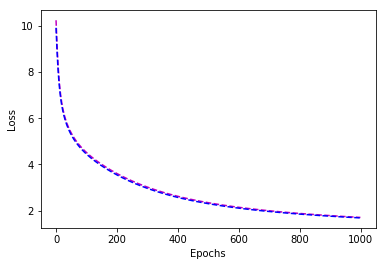

In [3]:
"""
Created on 10/17/19 @ 16:54:10

@author: ajithkumar-natarajan
"""

##############################TASK 1

#Importing necessary libraries
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools


#Function to load data
def load_mnist(path, kind='train'):
  import os
  import gzip

  """Load MNIST data from `path`"""
  labels_path = os.path.join(path,
                                '%s-labels-idx1-ubyte.gz'
                                % kind)
  images_path = os.path.join(path,
                                '%s-images-idx3-ubyte.gz'
                                % kind)
  with gzip.open(labels_path, 'rb') as lbpath:
    labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                                offset=8)

  with gzip.open(images_path, 'rb') as imgpath:
    images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                                offset=16).reshape(len(labels), 784)

  return images, labels
  
#Sigmoid function 
def sigmoid(z):
  a = 1/(1 + np.exp(-z))
  return a


#Sigmoid derivative 
def sigmoid_derivative(a):
  return a*(1 - a)


#Softmax function
def softmax(x):
  a = np.exp(x - np.max(x))
  return a / a.sum(axis = 1, keepdims = True)


#Loss function 
def compute_loss(a, y):
  return np.sum(-np.log(a[range(y.shape[0]), y]))/y.shape[0]


#Reading input data
x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')


#Normalizing input data
normalized_x_train = x_train/255
normalized_x_test = x_test/255


#Initializing values
x1 = normalized_x_train
x2 = normalized_x_test
y1 = y_train
y1_test = y_test
epochs = 1000
learning_rate = 0.01
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
y2 = y_train.reshape(len(y_train), 1)
y2_test = y_test.reshape(len(y_test), 1)
y2 = onehot_encoder.fit_transform(y2)
y2_test = onehot_encoder.fit_transform(y2_test)
m = y1.shape[0]
no_of_hidden_nodes = 128
w1 = np.random.randn(x1.T.shape[0], no_of_hidden_nodes) 
w2 = np.random.randn(no_of_hidden_nodes, 10) 
b1 = np.zeros(no_of_hidden_nodes)
b2 = np.zeros(10)    
training_loss = list()
validation_loss = list()

    
for epoch in range(epochs):
  #Foward propogation
  z1 = np.matmul(x1, w1)+ b1
  a1 = sigmoid(z1)
  z2 = np.matmul(a1, w2)+ b2
  a2 = softmax(z2)
  final_loss = compute_loss(a2, y1)
  print("Loss for epoch", epoch+1,":", final_loss)
  training_loss.append(final_loss)
  
  #Back propogation
  del_z2 = a2 - y2
  del_w2 = (1/m) * np.dot(a1.T, del_z2)
  del_b2 = (1/m) * np.sum(del_z2,axis = 0, keepdims = True)
  
  del_a1 = np.dot(del_z2, w2.T)
  del_z1 = del_a1 * sigmoid_derivative(a1)
  del_w1 = (1/m) * np.dot(x1.T, del_z1)
  del_b1 = (1/m) * np.sum(del_z1, axis = 0, keepdims = True)
  
  w1 = w1 - learning_rate * del_w1
  b1 = b1 - learning_rate * del_b1
  w2 = w2 - learning_rate * del_w2
  b2 = b2 - learning_rate * del_b2

  z1_test = np.matmul(x2, w1)+ b1
  a1_test = sigmoid(z1_test)
  z2_test = np.matmul(a1_test, w2)+ b2
  a2_test = softmax(z2_test)
  final_loss = compute_loss(a2_test, y1_test)
  validation_loss.append(final_loss)

#Test data prediction
acc = 0
y_pred = list()
for i,j in itertools.zip_longest(normalized_x_test, y_test):
  z1 = np.dot(i, w1) + b1
  a1 = sigmoid(z1)            
  z2 = np.dot(a1, w2) + b2
  a2 = softmax(z2)
  prediction = np.argmax(a2)
  y_pred.append(prediction)
  if prediction == j:
    acc = acc+1
accuracy = (acc / normalized_x_test.shape[0])*100
print("Test Accuracy:", accuracy, "%")

#Generating confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Plotting graphs
fig = plt.gcf()
plt.plot(training_loss, '--m', linestyle='--', markersize=1)
plt.plot(validation_loss, '--b', linestyle='--', markersize=1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
# fig.savefig('training_validation_loss_task1.png', dpi=100)






#############################TASK 2

# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

# LOG_DIR = './log'
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
#     .format(LOG_DIR)
# )

# get_ipython().system_raw('./ngrok http 6006 &')

# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

#necessary imports
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import pickle
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import TensorBoard



# def load_mnist(path, kind='train'):
# 	import os
# 	import gzip
# 	import numpy as np

# 	"""Load MNIST data from `path`"""
# 	labels_path = os.path.join(path,
#                                '%s-labels-idx1-ubyte.gz'
#                                % kind)
# 	images_path = os.path.join(path,
#                                '%s-images-idx3-ubyte.gz'
#                                % kind)
# 	with gzip.open(labels_path, 'rb') as lbpath:
# 		labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
#                                offset=8)

# 	with gzip.open(images_path, 'rb') as imgpath:
# 		images = np.frombuffer(imgpath.read(), dtype=np.uint8,
#                                offset=16).reshape(len(labels), 784)

# 	return images, labels

# x_train, y_train = load_mnist('data/fashion', kind='train')
# x_test, y_test = load_mnist('data/fashion', kind='t10k')

#Loading dataset from keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#setting batch size
batch_size = 512


# print(x_train.shape)
# print(x_test.shape)
# print(type(x_train))

# x_train = x_train.reshape(x_train, (60000, 28, 28 ))
# x_test = x_test.reshape(x_test, (60000, 28, 28))

# print(x_train.shape)
# print(x_test.shape)

# i = 13
# plt.imshow(x_train[i,:,:], cmap = matplotlib.cm.binary)
# plt.axis("off")
# plt.show()
# print("label-> ", y_train[i])

#normalizing data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test_orig = y_test
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Stacking up layers for neural network
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), 
                          # keras.layers.Dense(400, activation='sigmoid'), 
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(10, activation='softmax')])
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)

model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_test, y_test))
# with open('trainHistoryDict', 'wb') as file_pi:
        # pickle.dump(output.history, file_pi)

output = model.predict_classes(x_test)
# con_mat = tf.math.confusion_matrix(labels=y_test, predictions=output).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
# con_mat_df = pd.DataFrame(con_mat_norm,
#                      index = classes, 
#                      columns = classes)

#Printing confusion matrix
confusion_matrix = confusion_matrix(y_test_orig, output)
print(confusion_matrix)







#############################TASK 3
#Importing necessaryy libraries
import numpy as np
import keras
import matplotlib.pyplot as plot
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


# def load_mnist(path, kind='train'):
# 	import os
# 	import gzip

# 	"""Load MNIST data from `path`"""
# 	labels_path = os.path.join(path,
#                                '%s-labels-idx1-ubyte.gz'
#                                % kind)
# 	images_path = os.path.join(path,
#                                '%s-images-idx3-ubyte.gz'
#                                % kind)
# 	with gzip.open(labels_path, 'rb') as lbpath:
# 		labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
#                                offset=8)

# 	with gzip.open(images_path, 'rb') as imgpath:
# 		images = np.frombuffer(imgpath.read(), dtype=np.uint8,
#                                offset=16).reshape(len(labels), 784)

# 	return images, labels


# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#Loading dataset
x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')

#Getting data ready for CNN training
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test_orig = y_test
y_test = tf.keras.utils.to_categorical(y_test, 10)

#Building the CNN model
model = keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (28, 28, 1)), 
                          keras.layers.pooling.MaxPooling2D(pool_size = (2, 2)), 
                          keras.layers.Conv2D(64, (3, 3), activation='relu'), 
                          keras.layers.pooling.MaxPool2D(pool_size = (2, 2)), 
                          keras.layers.Dropout(0.25), 
                          keras.layers.Flatten(), 
                          keras.layers.Dense(256, activation='relu'), 
                          keras.layers.Dropout(0.5), 
                          keras.layers.Dense(10, activation='softmax')])
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

#Predicting output
output = model.predict_classes(x_test)

#Printing confusion matrix
confusion_matrix = confusion_matrix(y_test_orig, output)
print(confusion_matrix)

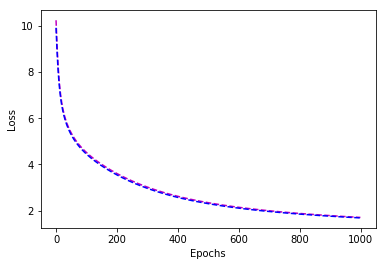

In [10]:
fig = plt.gcf()
plt.plot(training_loss, '--m', linestyle='--', markersize=1)
plt.plot(validation_loss, '--b', linestyle='--', markersize=1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
fig.savefig('training_validation_loss_task1.png', dpi=100)